# ⛩️ Anime Recommender System

---

## Project Overview

<p align="center">
  <img src="https://raw.githubusercontent.com/syahvan/anime-recommender-system/main/img/anime.jpg"/>
</p>

Anime telah menjadi bagian tak terpisahkan dari budaya populer di Indonesia, merajai hati para penggemar selama bertahun-tahun. Dari klasik seperti Doraemon dan Sailormoon hingga saga epik seperti Dragonball, One Piece, dan Naruto, keduanya telah mengukir jejaknya di layar televisi dan di hati para penggemar di seluruh negeri. Stasiun televisi pun tak ragu-ragu memanjakan penonton dengan aksi seru dan petualangan dari dunia anime yang memikat.

Dengan laju perkembangan yang pesat, industri animasi Jepang telah melahirkan sejumlah besar anime yang menggugah minat para penonton dari berbagai kalangan. [1]. Kehadiran platform _streaming_ dan _database_ yang kaya akan konten anime membuat penggemar anime memiliki kemudahan akses untuk menonton berbagai judul anime dari berbagai genre dan era. Namun, dengan begitu banyaknya pilihan yang tersedia, penggemar seringkali kesulitan untuk menemukan anime yang sesuai dengan preferensi dan minat mereka [2].

Untuk mengatasi tantangan ini, perlu adanya pengembangan sebuah sistem yang dapat memberikan rekomendasi secara efektif. Sistem rekomendasi bertujuan untuk menyajikan konten yang relevan dan menarik bagi penggemar anime berdasarkan preferensi mereka [3]. Dengan adanya sebuah sistem rekomendasi, diharapkan penggemar dapat lebih mudah menemukan anime yang sesuai dengan selera dan minat mereka, sehingga pengalaman menonton mereka dapat ditingkatkan dan mereka dapat menikmati berbagai judul anime dengan lebih maksimal.

## Business Understanding

### Problem Statements

Berdasarkan latar belakang di atas, berikut ini batasan masalah yang dapat diselesaikan dengan proyek ini:

- Bagaimana caranya mengembangkan sebuah sistem rekomendasi anime yang dapat disesuaikan dengan preferensi individu para penggemar anime?
- Model apa yang paling efektif dalam memberikan rekomendasi kepada penggemar anime untuk memilih anime yang sesuai?
- Bagaimana proses kerja sistem rekomendasi dalam memberikan rekomendasi kepada penggemar anime untuk memilih anime yang sesuai dengan preferensi mereka?

### Goals

Adapun tujuan dilakukannya proyek ini yaitu:

- Membuat suatu sistem rekomendasi anime bertujuan untuk memberikan kemudahan kepada penggemar anime dalam menemukan judul-judul anime yang cocok dengan preferensi mereka.
- Melakukan perbandingan kinerja berbagai model dalam sistem rekomendasi anime guna menemukan yang paling efektif.
- Menjelaskan prinsip kerja dari algoritma-algoritma model yang digunakan dalam sistem rekomendasi untuk memberikan rekomendasi anime kepada penggemar anime berdasarkan data seperti preferensi sebelumnya, rating, atau informasi lainnya.

### Solution Statements

- Untuk eksplorasi fitur, dilakukan melalui Analisis Univariat yang bertujuan untuk memeriksa distribusi suatu fitur tertentu di dalam dataset. Pendekatan ini melibatkan penggunaan teknik visualisasi data, seperti barplot, untuk menyajikan informasi mengenai fitur yang dipilih tersebut.
- Melakukan pemodelan menggunakan beberapa algoritma seperti _Content Based Filtering_ dan _Collaborative Filtering_ untuk mencapai solusi yang diinginkan.
- Untuk mengetahui perfoma model dilakukan pengecekan performa dengan metrik evaluasi seperti _Precision_, _Cosine similarity_, dan _Root Mean Squared Error_ (RMSE).

*Let's dive in!*

---

## Data Understanding

Data Understanding adalah tahap awal proyek untuk memahami data yang dimiliki. Supaya isi dataset lebih mudah dipahami, lakukan proses loading data terlebih dahulu. Jangan lupa import semua library yang dibutuhkan dalam pembuatan model.

In [97]:
# Data and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import textwrap

# Modelling
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback
from pathlib import Path

# TfidfVectorizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity

# Warning
import warnings
warnings.filterwarnings("ignore")

Dataset yang digunakan merupakan data anime yang berasal dari [MyAnimeList.net](https://myanimelist.net/) pada laman [Kaggle](https://www.kaggle.com/datasets/timnosov/anime-recommendations-database-clean/). Dataset tersebut berisikan 2 file csv, yaitu file *Anime* dan *Rating*. File Anime.csv yang terdiri dari 7 kolom dan 12294 baris, Sedangkan file Rating.csv terdiri dari 3 kolom dan 7813737 baris. 

Berikut merupakan informasi lebih detail dari masing masing kolom dataset:

*   **Anime.csv**
1.   `anime_id`: Id unik myanimelist.net untuk mengidentifikasi anime.
2.   `name`: nama lengkap anime
3.   `genre`: daftar genre untuk anime ini.
4.   `type`: film, TV, OVA, dll.
5.   `episodes`: seberapa banyak episode dalam acara ini, 1 jika film.
6.   `rating`: peringkat rata-rata dari 10 untuk anime ini.
7.   `members`: jumlah anggota komunitas yang ada di anime ini

*   **Rating.csv**

1.   `user_id`: id pengguna yang dibuat secara acak yang tidak dapat diidentifikasi.
2.   `anime_id`: anime yang telah dinilai pengguna ini.
3.   `rating`: anime yang telah dinilai oleh pengguna ini, rating dari 10 pengguna ini telah ditetapkan (-1 jika pengguna menontonnya tetapi tidak menetapkan peringkat).

 Mari kita load data untuk melihat sampel data.

In [2]:
# Load Dataset
dir_root = '/kaggle/input/anime-recommendations-database-clean/'
df_anime = pd.read_csv(dir_root + 'anime.csv')
df_rating = pd.read_csv(dir_root + 'rating.csv')

In [3]:
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10228 entries, 0 to 10227
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  10228 non-null  int64  
 1   name      10228 non-null  object 
 2   genre     10228 non-null  object 
 3   type      10228 non-null  object 
 4   episodes  10228 non-null  object 
 5   rating    10228 non-null  float64
 6   members   10228 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 559.5+ KB


In [5]:
df_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [6]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [7]:
# Mencetak data unique pada kolom di masing-masing dataset
print(f'Jumlah dimensi data anime : {df_anime.shape}')
print('Jumlah data unique pada kolom anime_id : ', len(df_anime['anime_id'].unique()))
print('Jumlah data unique pada kolom name : ', len(df_anime['name'].unique()))
print('Jumlah data unique pada kolom type : ', len(df_anime['type'].unique()))
print('Jumlah data unique pada kolom episodes  : ', len(df_anime['episodes'].unique()))
print('Jumlah data unique pada kolom genre : ', len(df_anime['genre'].unique()))
print('Jumlah data unique pada kolom rating : ', len(df_anime['rating'].unique()))
print('Jumlah data unique pada kolom member : ', len(df_anime['members'].unique()))
print('\n')
print(f'Jumlah dimensi data rating : {df_rating.shape}')
print('Jumlah data unique rating pada kolom rating: ', len(df_rating['rating'].unique()))

Jumlah dimensi data anime : (10228, 7)
Jumlah data unique pada kolom anime_id :  10228
Jumlah data unique pada kolom name :  10226
Jumlah data unique pada kolom type :  6
Jumlah data unique pada kolom episodes  :  186
Jumlah data unique pada kolom genre :  2747
Jumlah data unique pada kolom rating :  592
Jumlah data unique pada kolom member :  5638


Jumlah dimensi data rating : (7813737, 3)
Jumlah data unique rating pada kolom rating:  11


### Exploratory Data Analysis

Untuk memahami data lebih lanjut, dilakukan **Analisis Univariat** serta **Visualisasi Data**


In [8]:
# Color Palette
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

palette = "RdYlBu"

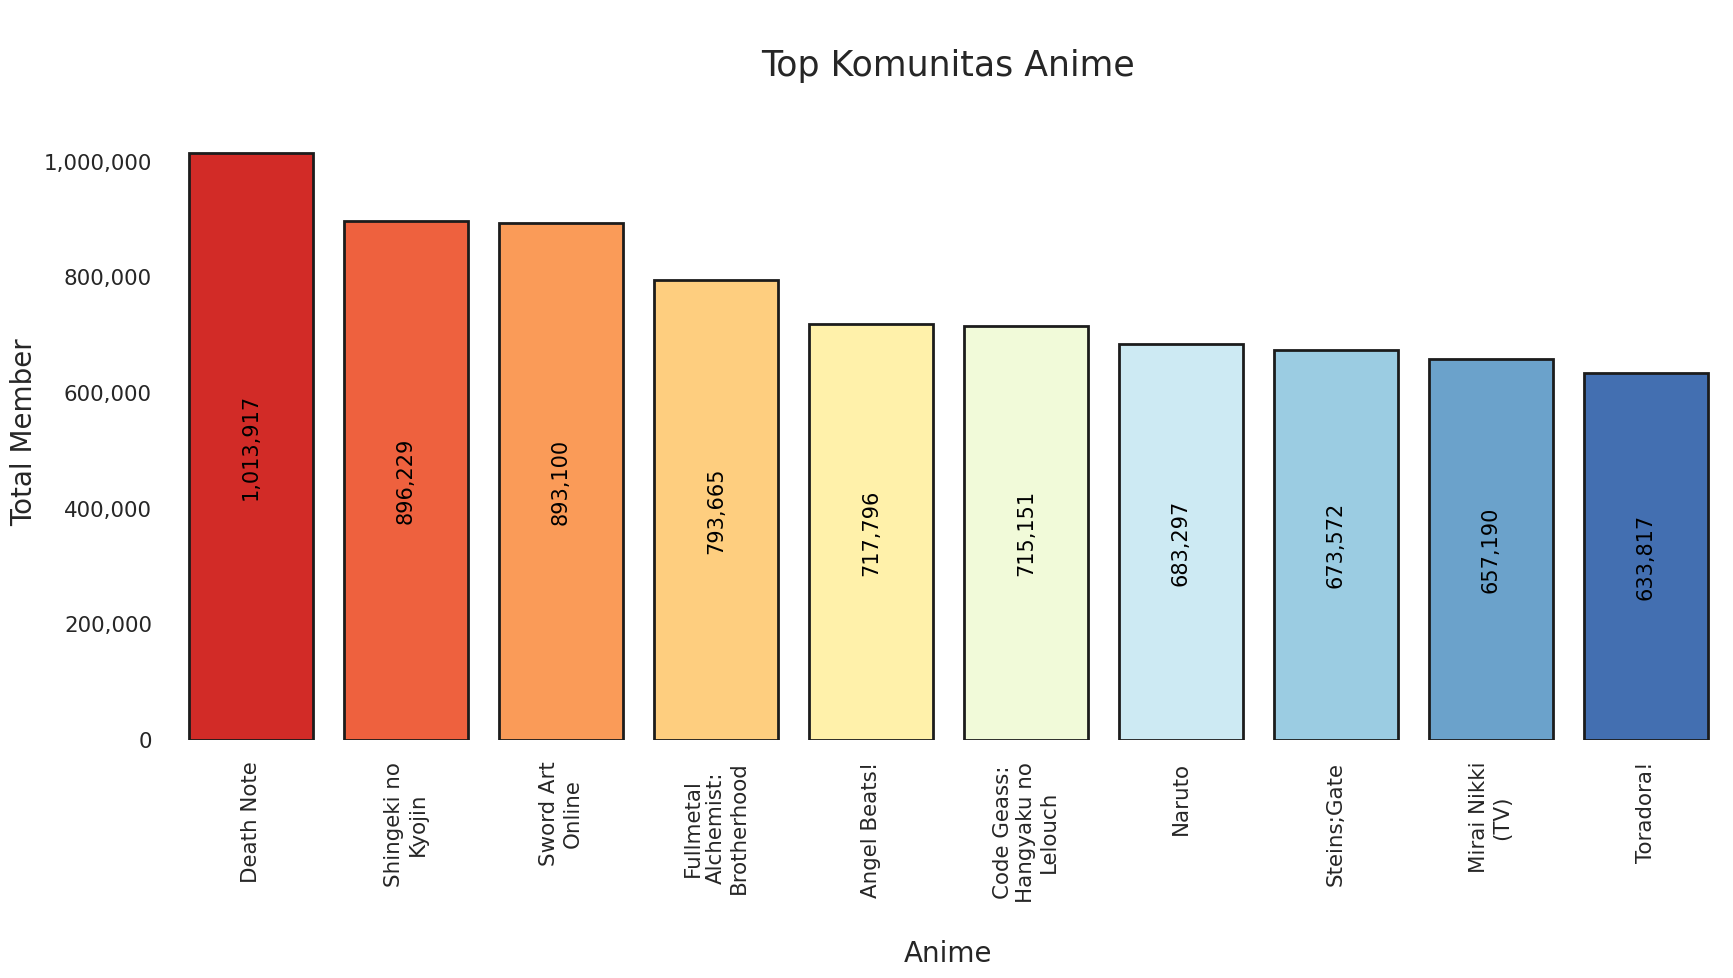

In [9]:
top_anime = df_anime.copy()
top_anime.drop_duplicates(subset="name", keep="first", inplace=True)
top_anime_temp1 = top_anime.sort_values(["members"], ascending=False)

plt.subplots(figsize=(20, 8))
p = sns.barplot(x=top_anime_temp1["name"][:10], y=top_anime_temp1["members"], palette="RdYlBu", saturation=1, edgecolor="#1c1c1c", linewidth=2)
p.axes.set_title("\nTop Komunitas Anime\n", fontsize=25)
plt.ylabel("Total Member", fontsize=20)
plt.xlabel("\nAnime", fontsize=20)

# Mengatur formatter sumbu y
p.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Mengatur label sumbu x
labels = [textwrap.fill(label, width=15) for label in top_anime_temp1["name"][:10]]
p.set_xticklabels(labels, rotation=90, ha='center')

for bar, val in zip(p.containers[0], top_anime_temp1["members"][:10]):
    height = bar.get_height()
    width = bar.get_width()
    p.text(bar.get_x() + width / 2, height / 2, '{:,}'.format(int(val)),
                ha='center', va='center', fontsize=15, color="black", rotation=90)

sns.despine(left=True, bottom=True)
plt.show()

**💡 Insights:**

**Death Note** memiliki anggota komunitas tertinggi diikuti oleh **Shingeki no Kyojin** dan **Sword Art Online**

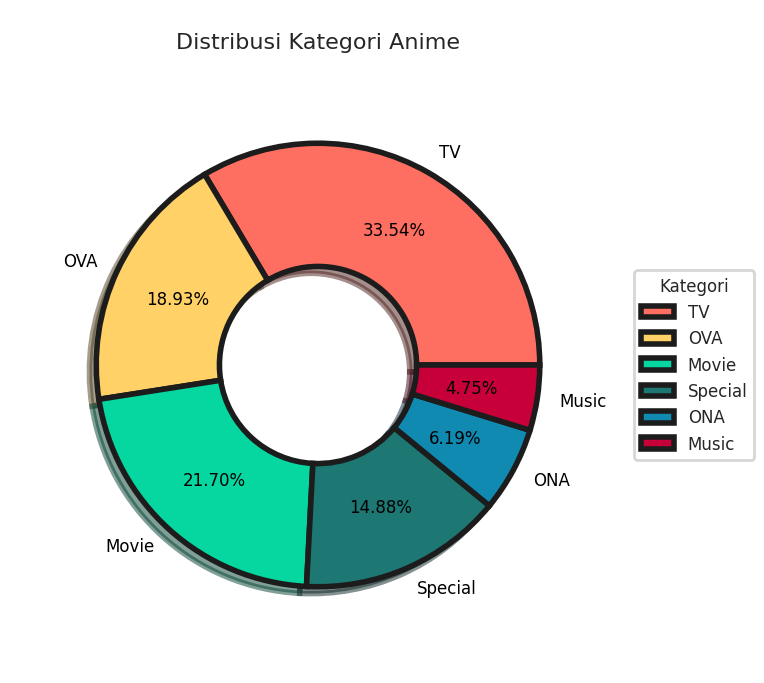

In [10]:
plt.subplots(figsize=(8, 8))

labels = ["TV","OVA","Movie","Special","ONA","Music"]
size = 0.5

# Warna yang digunakan
colors = ['#FF6F61', '#FFD166', '#06D6A0', "#1d7874", '#118AB2', '#C70039']

# Data untuk pie chart
data = [
    len(top_anime_temp1[top_anime_temp1["type"]=="TV"]["type"]),
    len(top_anime_temp1[top_anime_temp1["type"]=="OVA"]["type"]),
    len(top_anime_temp1[top_anime_temp1["type"]=="Movie"]["type"]),
    len(top_anime_temp1[top_anime_temp1["type"]=="Special"]["type"]),
    len(top_anime_temp1[top_anime_temp1["type"]=="ONA"]["type"]),
    len(top_anime_temp1[top_anime_temp1["type"]=="Music"]["type"])
]

wedges, texts, autotexts = plt.pie(data,
                                    labels=labels,
                                    explode=(0,0,0,0,0,0),
                                    textprops=dict(size=12, color="black"),
                                    autopct="%.2f%%", 
                                    pctdistance=0.7,
                                    radius=.9, 
                                    colors=colors, 
                                    shadow=True,
                                    wedgeprops=dict(width=size, edgecolor="#1c1c1c", linewidth=4),
                                    startangle=0)

plt.legend(wedges, labels, title="Kategori", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12, title_fontsize=12)
plt.title("\nDistribusi Kategori Anime", fontsize=16)
plt.show()


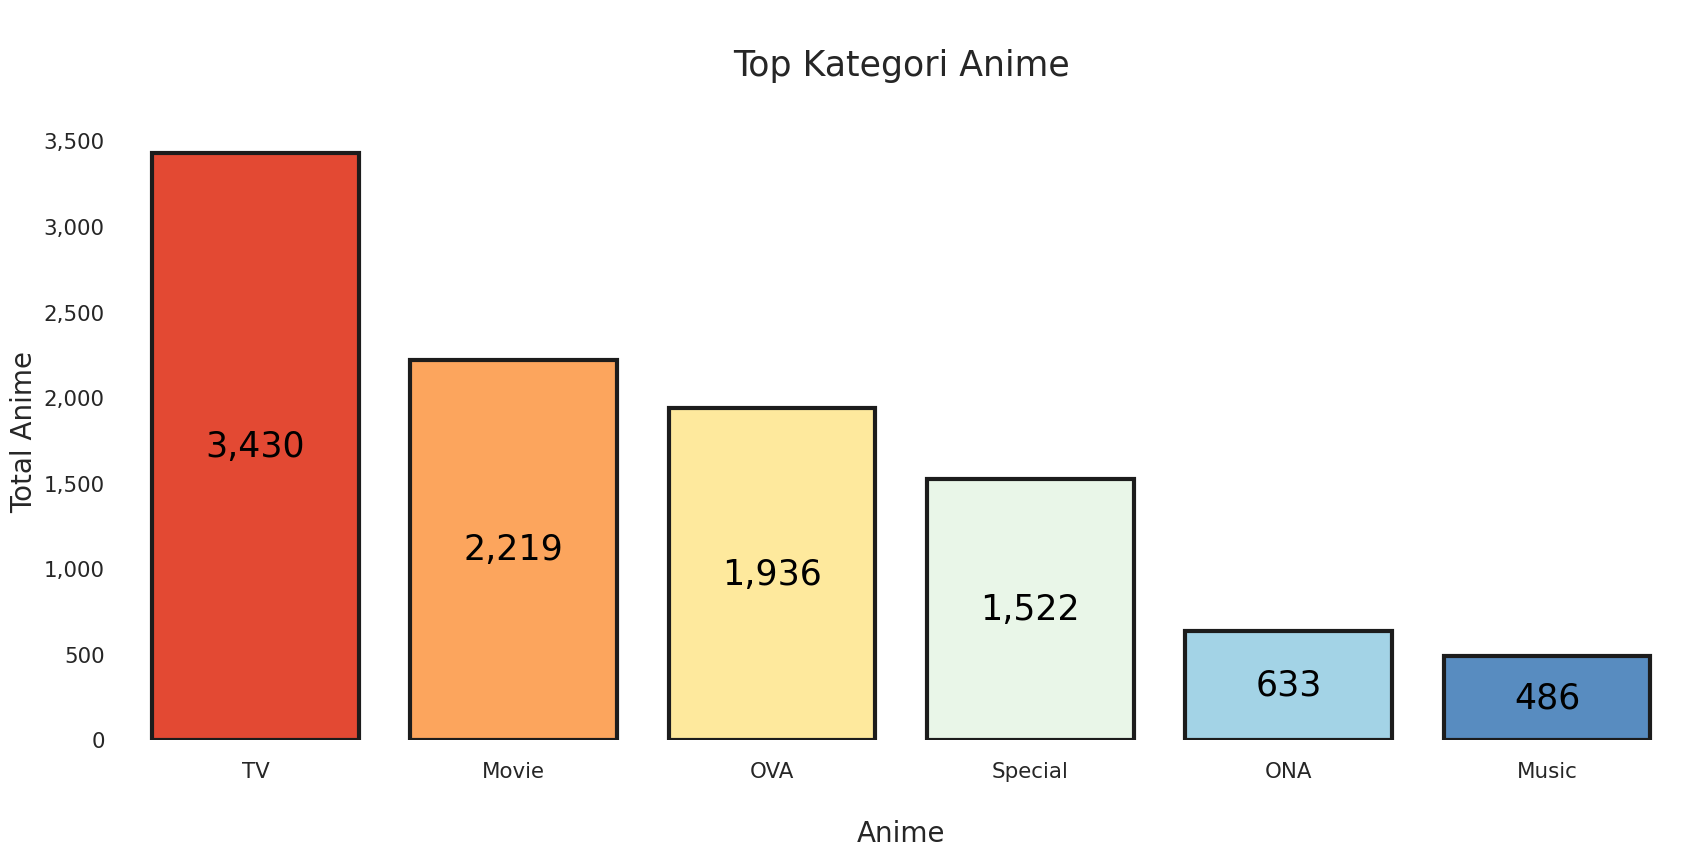

In [11]:
plt.subplots(figsize=(20, 8))
p = sns.countplot(x=top_anime_temp1["type"], order=top_anime_temp1["type"].value_counts().index, palette=palette, saturation=1, edgecolor="#1c1c1c", linewidth=3)
p.axes.set_title("\nTop Kategori Anime\n", fontsize=25)
plt.ylabel("Total Anime", fontsize=20)
plt.xlabel("\nAnime", fontsize=20)
plt.xticks(rotation=0)

# Mengatur formatter sumbu y
p.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Menambahkan label di tengah batang dengan format
for container in p.containers:
    for bar in container:
        height = bar.get_height()
        p.text(bar.get_x() + bar.get_width() / 2, height / 2, "{:,}".format(int(height)), ha='center', va='center', fontsize=25, color="black")

sns.despine(left=True, bottom=True)
plt.show()

**💡 Insights:**

* Ada 3430 anime atau 33.54% dari total anime yang disiarkan di TV.
* Sebanyak 2219 anime atau 21.7% dari total anime disiarkan sebagai film.
* Terdapat 1936 anime atau 18.93% dari total anime yang disiarkan sebagai OVA. Hal tersebut lebih banyak dari ONA yang mencakup 633 anime atau 6.19% dari total anime.

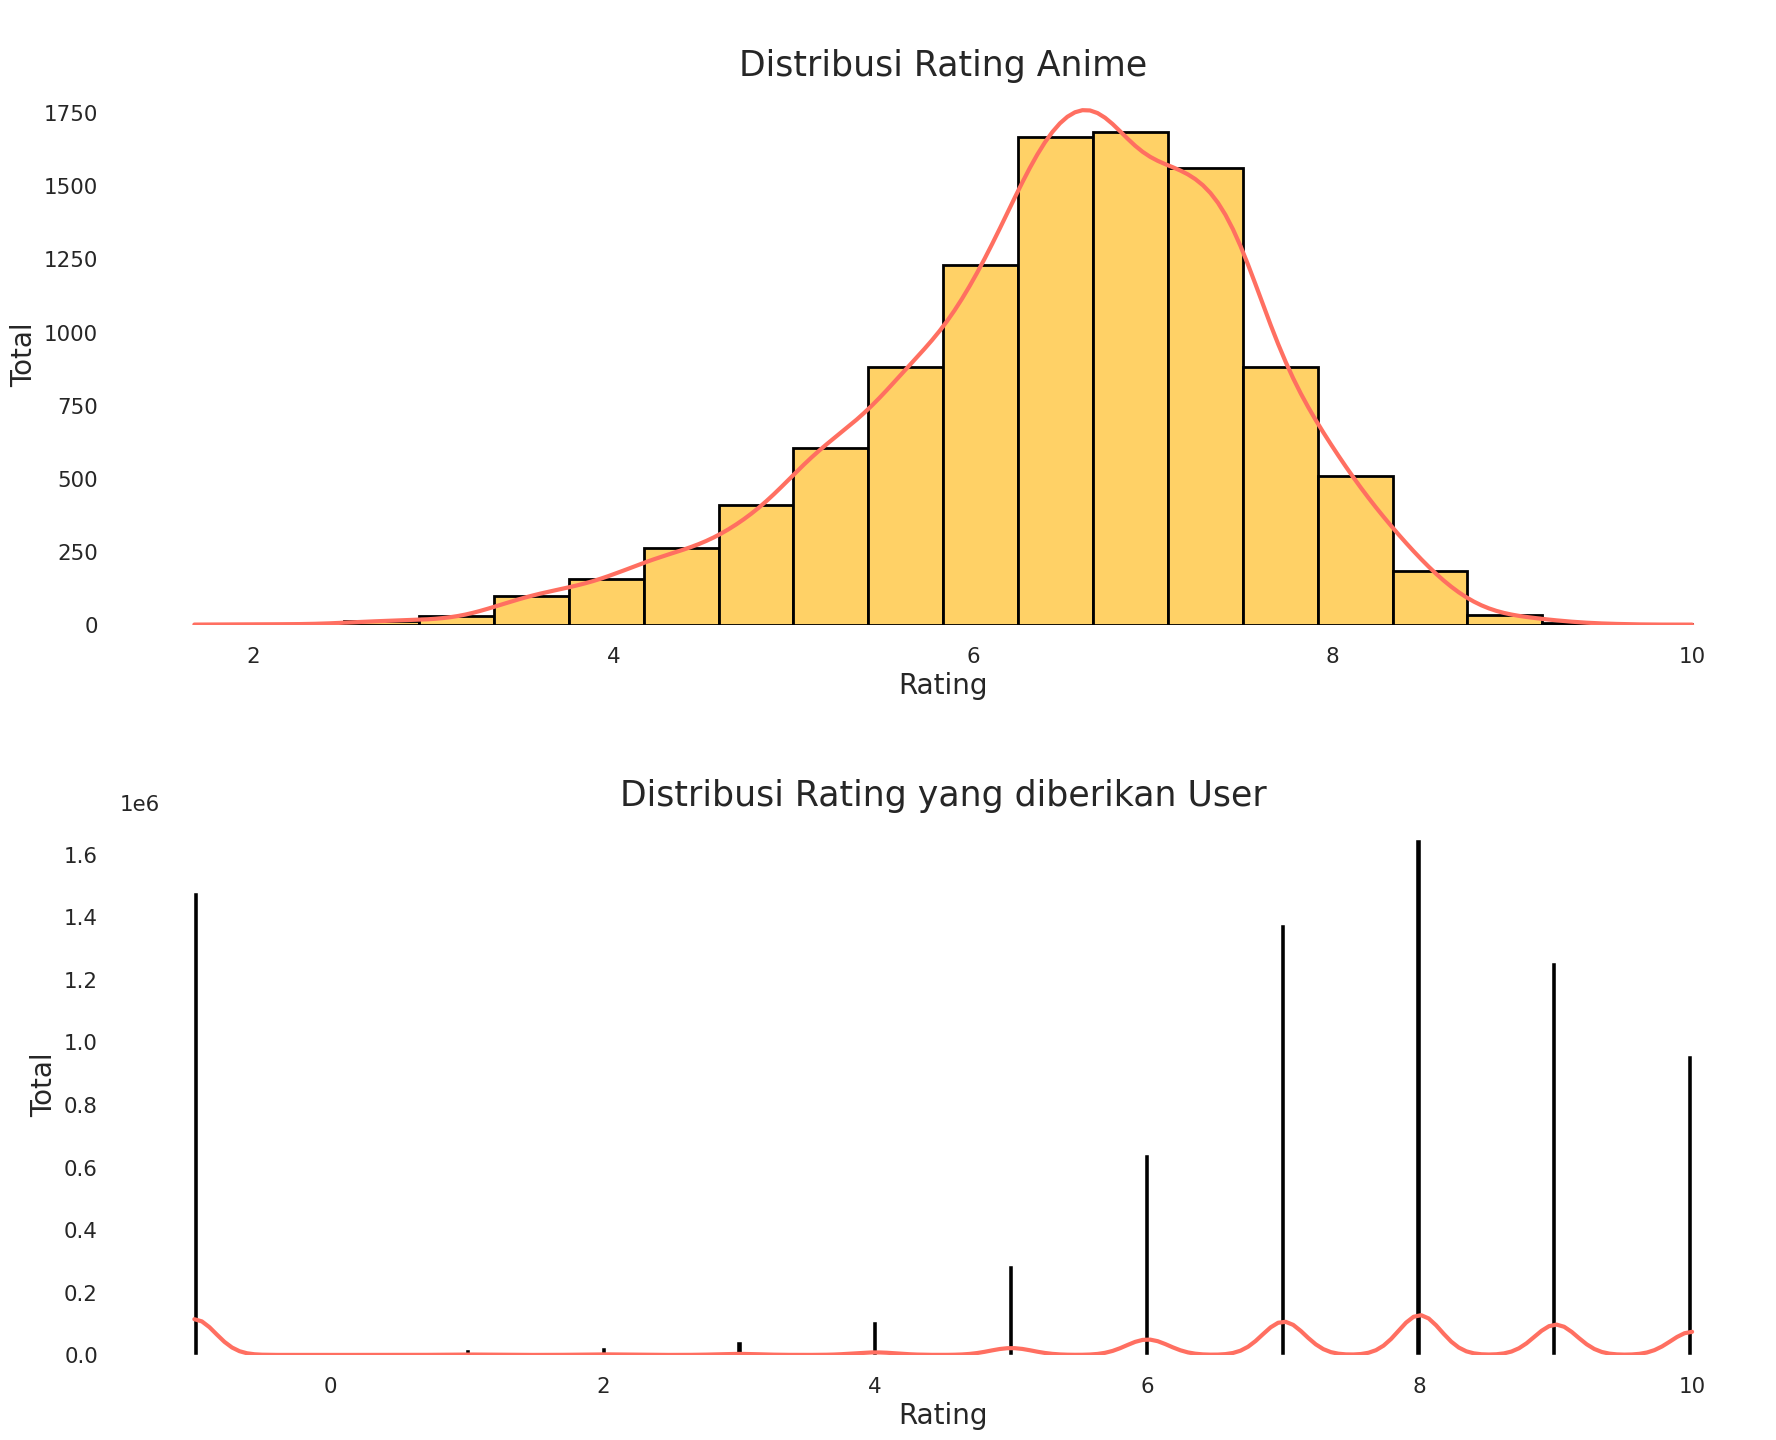

In [12]:
top_anime_temp2 = top_anime.sort_values(["rating"], ascending=False)

_, axs = plt.subplots(2, 1, figsize=(20, 16), sharex=False, sharey=False)
plt.tight_layout(pad=6.0)

sns.histplot(top_anime_temp2["rating"], color=colors[1], kde=True, ax=axs[0], bins=20, alpha=1, fill=True, edgecolor='black')
axs[0].lines[0].set_color(colors[0])
axs[0].set_title("\nDistribusi Rating Anime", fontsize=25)
axs[0].set_xlabel("Rating\n", fontsize=20)
axs[0].set_ylabel("Total", fontsize=20)

sns.histplot(df_rating["rating"], color='black', kde=True, ax=axs[1], bins="auto", alpha=1, fill=True)
axs[1].lines[0].set_color(colors[0])
axs[1].set_title("\n\n\nDistribusi Rating yang diberikan User", fontsize=25)
axs[1].set_xlabel("Rating", fontsize=20)
axs[1].set_ylabel("Total", fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()


**💡 Insights:**

* Sebagian besar rating Anime tersebar antara 5.5 - 8.0
* Sebagian besar rating pengguna tersebar antara 6.0 - 10.0
* Modus dari distribusi rating pengguna berada di sekitar 8.0
* Rating user bernilai -1 merupakan outliers dalam rating pengguna yang dapat diabaikan

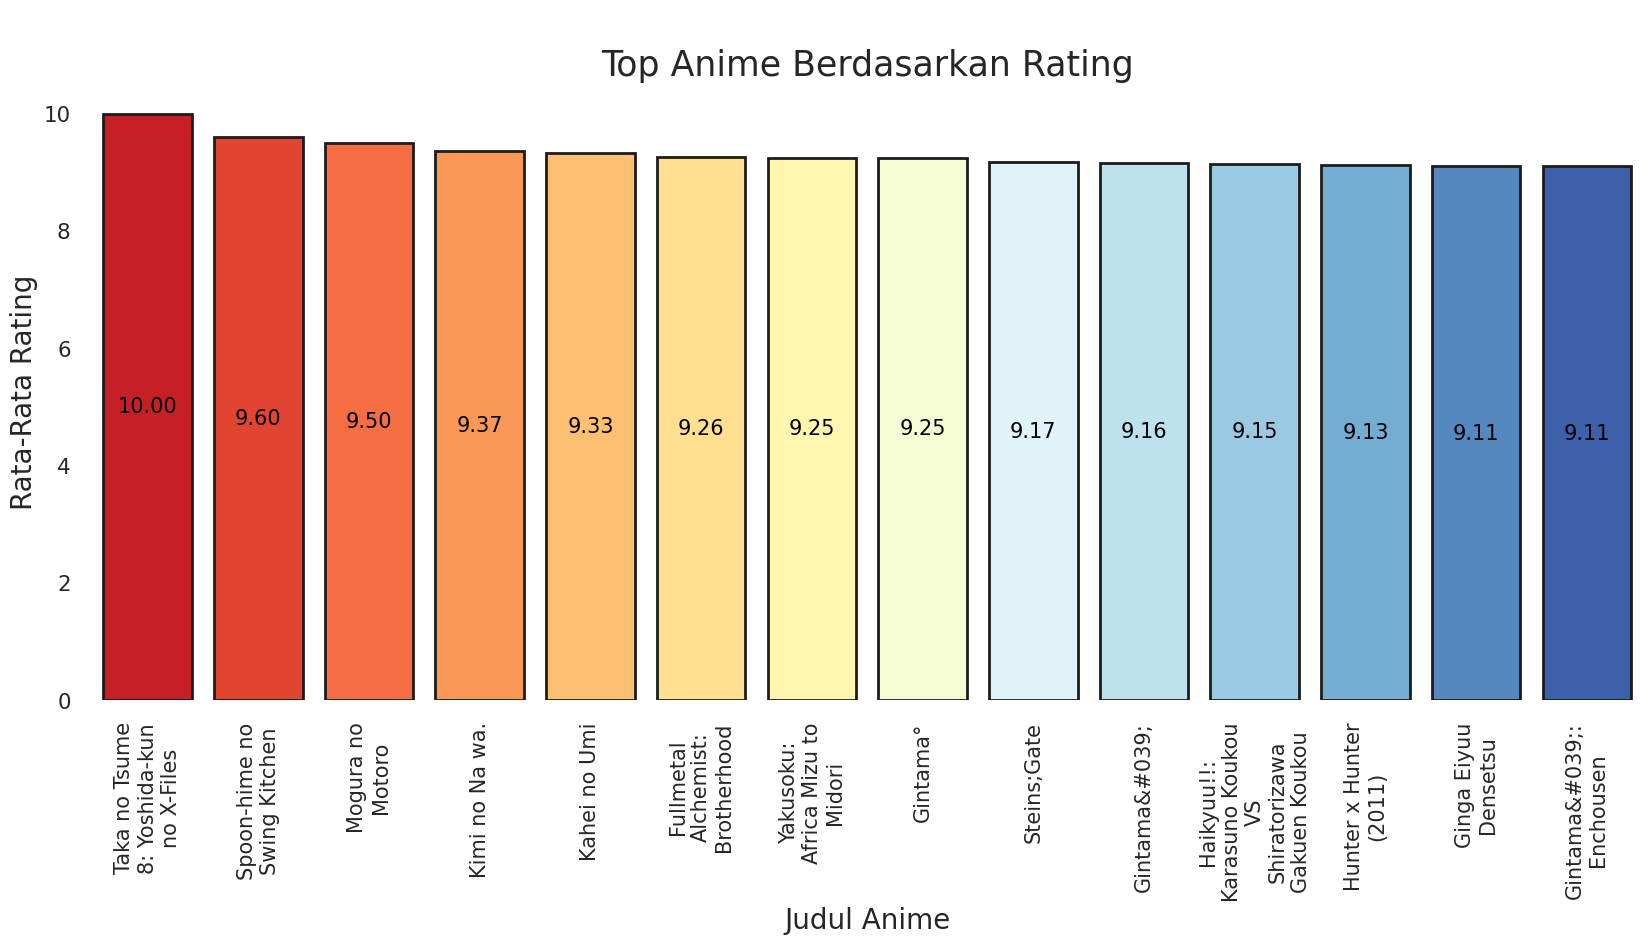

In [13]:
plt.subplots(figsize=(20, 8))
p = sns.barplot(x=top_anime_temp2["name"][:14], y=top_anime_temp2["rating"], palette=palette, saturation=1, edgecolor="#1c1c1c", linewidth=2)
p.axes.set_title("\nTop Anime Berdasarkan Rating", fontsize=25)
plt.ylabel("Rata-Rata Rating", fontsize=20)
plt.xlabel("Judul Anime", fontsize=20)
plt.xticks(rotation=90)

# Mengatur label sumbu x menjadi 2 baris
p.set_xticklabels([textwrap.fill(label, 15) for label in top_anime_temp2["name"][:14]], fontsize=15)

for bar in p.patches:
    # Mendapatkan posisi batang
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()

    # Menambahkan teks di tengah batang
    p.text(x + width / 2, y + height / 2, f'{height:.2f}', ha='center', va='center', fontsize=15, color='black')

sns.despine(left=True, bottom=True)
plt.show()

**💡 Insights:**

**Taka no Tsume 8** memiliki rating tertinggi diikuti oleh **Spoon-hime no Swing Kitchen** dan **Mogura no Motoro**

Total genre unique adalah 39


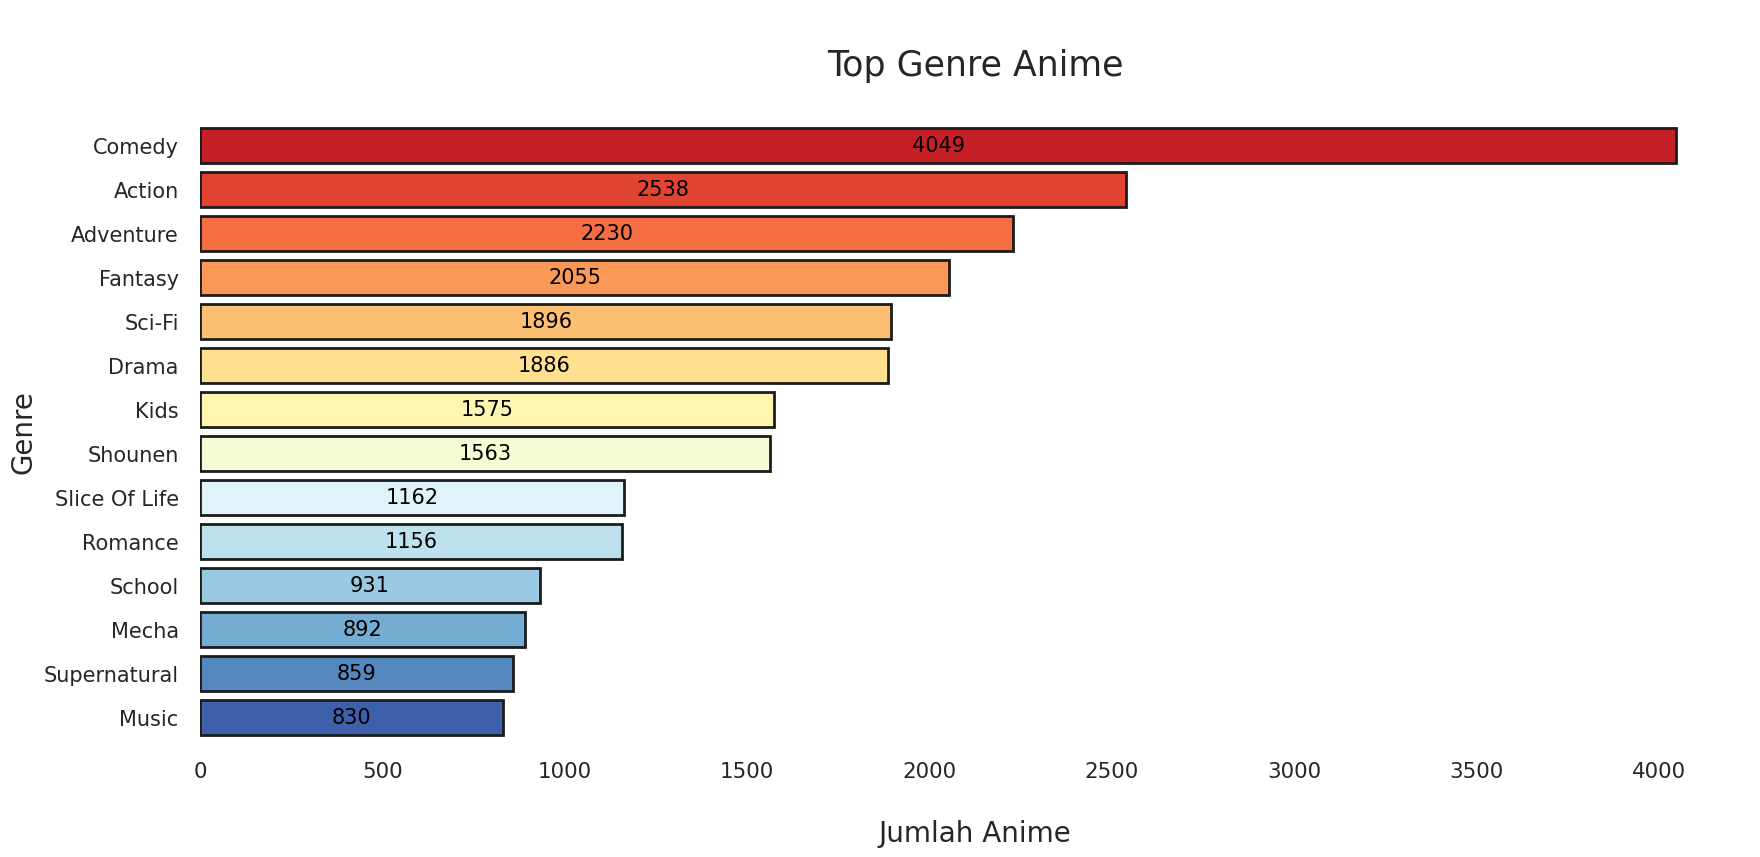

In [14]:
top_anime_temp3 = top_anime[["genre"]]
top_anime_temp3["genre"] = top_anime_temp3["genre"].str.split(", | , | ,")
top_anime_temp3 = top_anime_temp3.explode("genre")
top_anime_temp3["genre"] = top_anime_temp3["genre"].str.title()

print(f'Total genre unique adalah {len(top_anime_temp3["genre"].unique())}')

plt.subplots(figsize=(20, 8))
p = sns.barplot(y=top_anime_temp3["genre"].value_counts().index[:14], x=top_anime_temp3["genre"].value_counts()[:14], palette="RdYlBu", saturation=1, edgecolor="#1c1c1c", linewidth=2, orient='h')
p.axes.set_title("\nTop Genre Anime\n", fontsize=25)
plt.xlabel("\nJumlah Anime", fontsize=20)
plt.ylabel("Genre", fontsize=20)

# Mengatur label sumbu y menjadi 2 baris
p.set_yticklabels([textwrap.fill(label, 15) for label in top_anime_temp3["genre"].value_counts().index[:14]], fontsize=15)

for bar in p.patches:
    # Mendapatkan posisi batang
    width = bar.get_width()
    height = bar.get_height()
    x = bar.get_x()
    y = bar.get_y()

    # Menambahkan teks di tengah batang
    p.text(x + width / 2, y + height / 2, f'{int(width)}', ha='center', va='center', fontsize=15, color='black')

sns.despine(left=True, bottom=True)
plt.show()

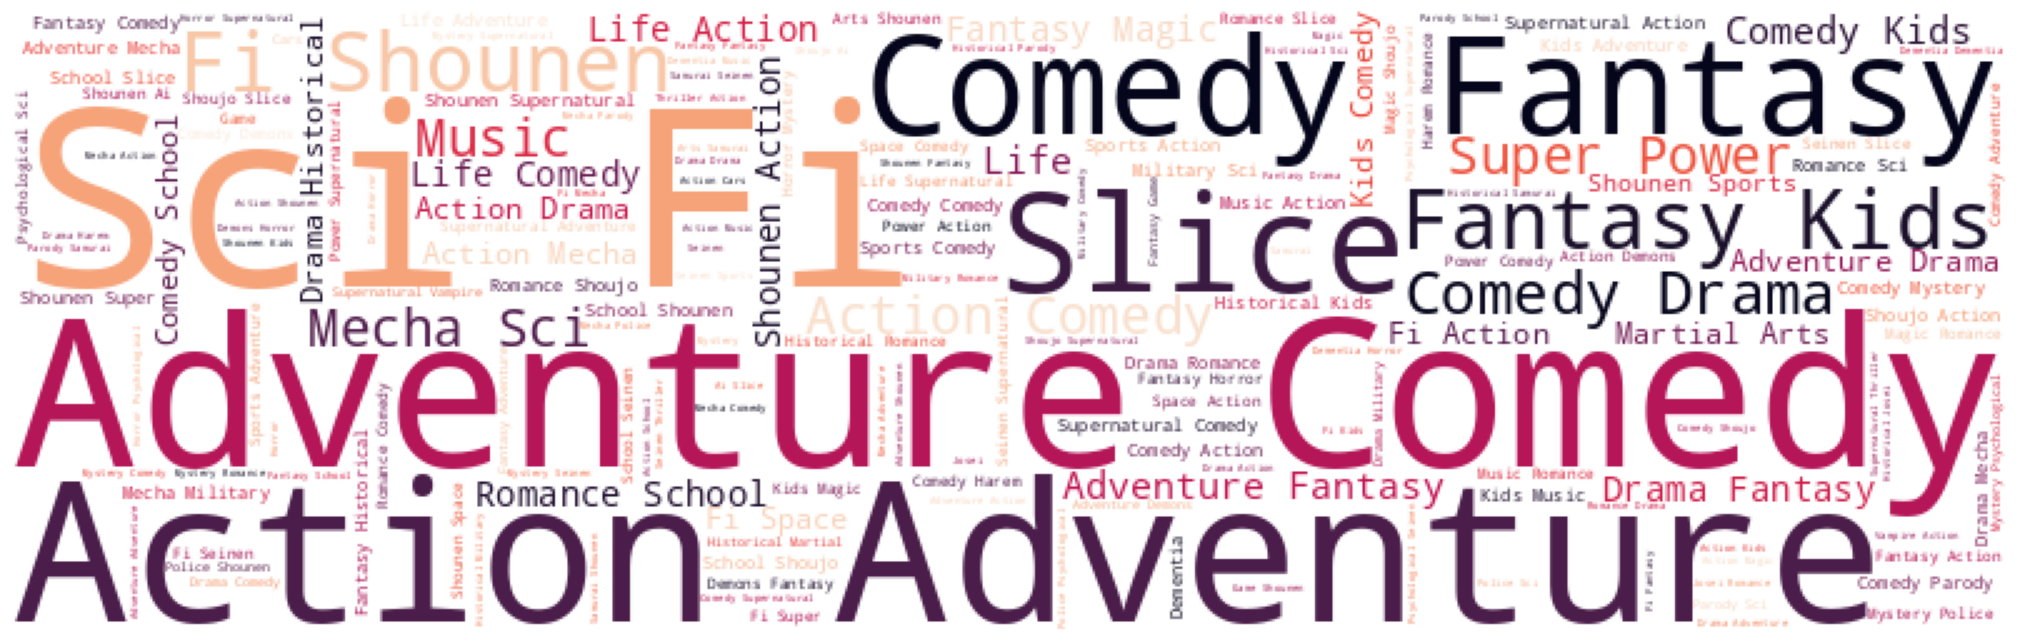

In [15]:
wordcloud = WordCloud(width = 800, height = 250, background_color ="white",colormap ="rocket",
                      max_font_size=100, stopwords =None,repeat= True).generate(top_anime["genre"].str.cat(sep=", | , | ,"))

plt.figure(figsize = (20, 8)) 
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.tight_layout(pad = 0) 
plt.show()

**💡 Insights:**

Terdapat 39 genre dengan genre **Comedy** memiliki jumlah terbanyak diikuti oleh genre **Action** dan **Adventure**

## Data Preparation

Dalam _data preparation_, prinsip **"_garbage in, garbage out_"** berlaku. Artinya, jika data yang digunakan untuk melatih model tidak berkualitas baik, maka hasil prediksi dari model tersebut juga akan tidak akurat atau tidak dapat diandalkan. Dengan memastikan data yang digunakan untuk melatih model memiliki kualitas yang baik, model yang dihasilkan dapat lebih andal dalam merekomendasikan anime

### Data Cleaning

Selanjutnya, dataset perlu dibersihkan agar data menjadi lebih terstruktur dan siap untuk diproses lebih lanjut.

#### Mengecek Missing Value

In [16]:
df_anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [17]:
df_rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

Tidak ada missing value pada dataset.

#### Menghapus Rating User yang Memiliki Nilai -1

In [18]:
df_rating["rating"].replace(to_replace = -1 , value = np.nan ,inplace=True)
df_rating = df_rating.dropna(axis = 0)

#### Mengecek Data Duplikat pada 'df_anime'

In [19]:
# Mengecek duplikat pada kolom 'anime_id' dan 'name' dalam DataFrame 'df_anime'
duplikat_kolom = df_anime.duplicated(subset=['anime_id', 'name'])

# Menampilkan baris yang memiliki data duplikat pada kolom tersebut
data_duplikat = df_anime[duplikat_kolom]

print("Data duplikat pada 'df_anime':")
print(data_duplikat)

Data duplikat pada 'df_anime':
Empty DataFrame
Columns: [anime_id, name, genre, type, episodes, rating, members]
Index: []


Tidak ada data duplikat pada 'df_anime' pada dataset.

#### Membersihkan Teks Judul Anime

In [20]:
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

df_anime["name"] = df_anime["name"].apply(text_cleaning)

Sekarang data sudah siap digunakan.

## Modeling

<p align="center">
    <br>
    <img src="https://raw.githubusercontent.com/syahvan/anime-recommender-system/main/img/modelling.gif"/>
</p>

Untuk tahap pemodelan, digunakan dua algoritma, yakni **_Content Based Filtering_** dan **_Collaborative Filtering_.**

### 1. Model Development dengan Content Based Filtering

_Content Based Filtering_ adalah salah satu pendekatan dalam sistem rekomendasi dimana rekomendasi diberikan berdasarkan karakteristik atau konten dari item yang sudah ada. Dalam konteks sistem rekomendasi anime, algoritma ini menganalisis atribut-atribut dari setiap anime, seperti genre untuk menghasilkan rekomendasi kepada pengguna.

In [21]:
data_genre = df_anime.copy()
data_genre.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Pertama-tama, ekstrak fitur dari kategori yang dipilih dengan TF-IDF Vectorizer

In [22]:
# Inisialisasi TfidfVectorizer
tfid = TfidfVectorizer()

# Hitung idf pada kategori yang dipilih
tfid.fit(data_genre['genre'])

# Mapping array dari fitur index integer ke fitur nama
tfid.get_feature_names_out()

array(['action', 'adventure', 'ai', 'arts', 'cars', 'comedy', 'dementia',
       'demons', 'drama', 'fantasy', 'fi', 'game', 'harem', 'historical',
       'horror', 'josei', 'kids', 'life', 'magic', 'martial', 'mecha',
       'military', 'music', 'mystery', 'of', 'parody', 'police', 'power',
       'psychological', 'romance', 'samurai', 'school', 'sci', 'seinen',
       'shoujo', 'shounen', 'slice', 'space', 'sports', 'super',
       'supernatural', 'thriller', 'vampire'], dtype=object)

Selanjutnya, lakukan fit dan transformasi ke dalam bentuk matriks.

In [23]:
# Melakukan fit lalu transformasikan ke bentuk matrix
tfidf_matrix = tfid.fit_transform(data_genre['genre'])

# Cek ukuran matrix tfidf
tfidf_matrix.shape

(10228, 43)

Perhatikanlah, matriks memiliki berukuran (10228, 43). Nilai 10228 merupakan ukuran data dan 43 merupakan matrik kategori yang dipilih.

Untuk menghasilkan vektor tf-idf dalam bentuk matriks, gunakan fungsi todense().

In [24]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.5431563 , 0.        ,
         0.        ],
        [0.2933874 , 0.30923531, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.2500519 , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

Selanjutnya, lihat matriks tf-idf untuk nama anime terhadap kategori yang dipilih.


In [25]:
# Membuat dataframe untuk melihat tf-idf matrix

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfid.get_feature_names_out(),
    index=data_genre.genre
).sample(22, axis=1).sample(5, axis=0)

,seinen,action,space,cars,josei,music,life,horror,samurai,mystery,...,ai,sports,comedy,kids,power,historical,shoujo,harem,drama,game
genre,,,,,,,,,,,,,,,,,,,,,
"Action, Demons, Seinen, Super Power",0.45478,0.264341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0000,0.467152,0.0,0.0,0.0,0.0,0.0
"Action, Comedy",0.00000,0.778990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.627037,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
Comedy,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,1.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
"Action, Kids, Mystery",0.00000,0.433118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.736565,...,0.0,0.0,0.000000,0.5195,0.000000,0.0,0.0,0.0,0.0,0.0
Mecha,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0


Output matriks tf-idf di atas menunjukkan hubungan antara nama anime terhadap kategori yang dipilih. Matriks ini menunjukkan seberapa besar korelasi antara nama anime terhadap kategori yang dipilih.

Selanjutnya, untuk membangun sitem rekomendasi, perlu dilakukan perhitungan derajat kesamaan antara nama anime satu dengan nama anime lainnya untuk menghasilkan kandidat nama anime yang akan direkomendasikan.

kita akan menggunakan model Cosine Similarity.

In [26]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.13859155, 0.        , ..., 0.28738027, 0.        ,
        0.        ],
       [0.13859155, 1.        , 0.17666538, ..., 0.22547868, 0.        ,
        0.        ],
       [0.        , 0.17666538, 1.        , ..., 0.        , 0.58066343,
        0.20127585],
       ...,
       [0.28738027, 0.22547868, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.58066343, ..., 0.        , 1.        ,
        0.34663084],
       [0.        , 0.        , 0.20127585, ..., 0.        , 0.34663084,
        1.        ]])

Kode di atas menghasilkan keluaran berupa matriks kesamaan dalam bentuk array.

Selanjutnya, lihat matriks kesamaan setiap anime dengan menampilkan nama anime dalam 5 sampel kolom (axis = 1) dan 5 sampel baris (axis=0).

In [27]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa name
cosine_sim_df = pd.DataFrame(cosine_sim, index=data_genre['name'], columns=data_genre['name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap anime
cosine_sim_df.sample(5, axis=1).sample(5, axis=0)

Shape: (10228, 10228)


name,Cossette no Shouzou,Sekai Meisaku Douwa: Wow! Maerchen Oukoku,Wonderful Days,Kitte no Gensou,Hottarake no Shima: Haruka to Mahou no Kagami
name,,,,,
Inazuma Eleven,0.000000,0.0,0.000000,0.000000,0.0
World Trigger,0.179823,0.0,0.457044,0.000000,0.0
Bulg-eunmae,0.000000,0.0,0.000000,0.000000,0.0
Higurashi no Naku Koro ni Special: Nekogoroshi-hen,0.000000,0.0,0.000000,0.427819,0.0
Giga Tribe,0.000000,0.0,0.000000,0.236277,0.0


Dengan cosine similarity, dapat diidentifikasi kesamaan antara satu anime dengan anime lainnya. Shape (10228, 10228) merupakan ukuran matriks similarity dari data yang dimiliki. Berdasarkan data yang ada, matriks di atas sebenarnya berukuran 10228 anime x 10228 anime (masing-masing dalam sumbu X dan Y). Artinya, model mengidentifikasi tingkat kesamaan pada 10228 anime. Model yang dibangun dapat menampilkan rekomendasi sejumlah N anime serupa.

Nah, dengan data kesamaan (similarity), dapat direkomendasikan daftar anime yang mirip (similar) dengan anime yang sebelumnya pernah digunakan pengguna.

Selanjutnya buat sejumlah top-N recommendation anime pada pengguna yang diatur dalam parameter k.

In [28]:
def rekomendasi_anime(title, similarity_data=cosine_sim_df, items=data_genre[['name', 'genre', 'type']], k=5):
    """
    Rekomendasi anime berdasarkan kemiripan dataframe
 
    Parameter:
    ---
    title : tipe data string (str)
            judul anime (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan anime sebagai 
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---
 
 
    Pada index ini, kita mengambil k dengan nilai similarity terbesar 
    pada index matrix yang diberikan (i).
    """
 
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama anime agar nama anime yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(title, errors='ignore')
 
    # Menghitung similarity score dan menambahkannya ke dalam DataFrame
    similarity_scores = similarity_data.loc[closest, title].tolist()
    closest_df = pd.DataFrame(closest).merge(items)
    closest_df['similarity_score'] = similarity_scores
    
    return closest_df.head(k)

Perhatikanlah, dengan menggunakan argpartition, diambil sejumlah nilai k tertinggi dari similarity data (dalam kasus ini: dataframe cosine_sim_df). Kemudian, ambil data dari bobot (tingkat kesamaan) tertinggi ke terendah. Data ini dimasukkan ke dalam variabel closest.

Selanjutnya, terapkan kode untuk menemukan rekomendasi yang mirip dengan anime yang pernah digunakan pengguna.

<p align="center">
    <br>
    <img src="https://raw.githubusercontent.com/syahvan/anime-recommender-system/main/img/naruto.gif"/>
</p>

In [29]:
data_genre[data_genre.name.eq('Naruto: Shippuuden')]

,anime_id,name,genre,type,episodes,rating,members
607,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578


Terakhir, dapatkan nama rekomendasi anime dengan memanggil fungsi yang telah didefinisikan sebelumnya.

In [30]:
# Mendapatkan rekomendasi anime
rekomendasi_anime('Naruto: Shippuuden')

,name,genre,type,similarity_score
0,Boruto: Naruto the Movie - Naruto ga Hokage ni...,"Action, Comedy, Martial Arts, Shounen, Super P...",Special,1.0
1,Naruto x UT,"Action, Comedy, Martial Arts, Shounen, Super P...",OVA,1.0
2,Naruto Shippuuden: Sunny Side Battle,"Action, Comedy, Martial Arts, Shounen, Super P...",Special,1.0
3,Naruto: Shippuuden Movie 4 - The Lost Tower,"Action, Comedy, Martial Arts, Shounen, Super P...",Movie,1.0
4,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,1.0


<p align="center">
    <br>
    <img src="https://raw.githubusercontent.com/syahvan/anime-recommender-system/main/img/YourName.gif"/>
</p>

In [31]:
data_genre[data_genre.name.eq('Kimi no Na wa.')]

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630


In [32]:
# Mendapatkan rekomendasi anime
rekomendasi_anime('Kimi no Na wa.')

,name,genre,type,similarity_score
0,Wind: A Breath of Heart OVA,"Drama, Romance, School, Supernatural",OVA,1.000000
1,Wind: A Breath of Heart (TV),"Drama, Romance, School, Supernatural",TV,1.000000
2,Aura: Maryuuin Kouga Saigo no Tatakai,"Comedy, Drama, Romance, School, Supernatural",Movie,0.957565
3,Otome wa Boku ni Koishiteru,"Comedy, Drama, Romance, School",TV,0.790381
4,Yahari Ore no Seishun Love Comedy wa Machigatt...,"Comedy, Drama, Romance, School",TV,0.790381


<p align="center">
    <br>
    <img src="https://raw.githubusercontent.com/syahvan/anime-recommender-system/main/img/aot.gif"/>
</p>

In [33]:
data_genre[data_genre.name.eq('Shingeki no Kyojin')]

,anime_id,name,genre,type,episodes,rating,members
85,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229


In [34]:
# Mendapatkan rekomendasi anime
rekomendasi_anime('Shingeki no Kyojin')

,name,genre,type,similarity_score
0,Shingeki no Kyojin: Ano Hi Kara,"Action, Drama, Fantasy, Shounen, Super Power",Special,1.000000
1,Shingeki no Kyojin Movie 1: Guren no Yumiya,"Action, Drama, Fantasy, Shounen, Super Power",Movie,1.000000
2,Shingeki no Kyojin Movie 2: Jiyuu no Tsubasa,"Action, Drama, Fantasy, Shounen, Super Power",Movie,1.000000
3,Shingeki no Kyojin OVA,"Action, Drama, Fantasy, Shounen, Super Power",OVA,1.000000
4,One Piece: Romance Dawn Story,"Action, Comedy, Fantasy, Shounen, Super Power",OVA,0.911839


### 2. Model Development dengan Collaborative Filtering

_Collaborative Filtering_ adalah pendekatan lain dalam sistem rekomendasi dimana rekomendasi diberikan berdasarkan perilaku atau preferensi pengguna serta kelompok pengguna lainnya. Dalam konteks sistem rekomendasi anime, algoritma ini menganalisis perilaku penonton, seperti _rating_ yang diberikan oleh pengguna pada anime tertentu, untuk memberikan rekomendasi kepada pengguna. Terdapat dua jenis utama dari _Collaborative Filtering_:

- **_Item-Based Collaborative Filtering_**: Metode ini mencari kemiripan antara item berdasarkan seberapa sering item-item tersebut dikonsumsi bersama oleh pengguna. Rekomendasi dibuat dengan mengidentifikasi item-item yang memiliki pola konsumsi yang mirip, lalu merekomendasikan item-item tersebut kepada pengguna yang memiliki riwayat konsumsi yang mirip.
- **_User-Based Collaborative Filtering_**: Metode ini mencari kemiripan antara pengguna berdasarkan riwayat interaksi mereka dengan item. Rekomendasi dibuat dengan mengidentifikasi pengguna-pengguna yang memiliki preferensi yang mirip dengan pengguna yang ingin direkomendasikan, lalu memperoleh item yang belum dikonsumsi oleh pengguna tersebut dari pengguna-pengguna yang mirip tersebut.

In [35]:
data_cf = df_rating.copy()
data_cf.head()

,user_id,anime_id,rating
47,1,8074,10.0
81,1,11617,10.0
83,1,11757,10.0
101,1,15451,10.0
153,2,11771,10.0


Ada banyak pengguna yang hanya memberikan rating satu kali, meskipun mereka telah memberi rating 5 anime, hal tersebut tidak dapat dianggap sebagai catatan berharga untuk rekomendasi. Jadi kami akan mempertimbangkan minimum 50 peringkat oleh pengguna sebagai nilai ambang batas.

In [36]:
selected_users = data_cf["user_id"].value_counts()
data_cf = data_cf[data_cf["user_id"].isin(selected_users[selected_users >= 50].index)]

Selanjutnya, kita perlu melakukan persiapan data untuk menyandikan (encode) fitur `user_id` dan `anime_id` ke dalam indeks integer.

In [37]:
# Mengubah user_id menjadi list tanpa nilai yang sama
user_ids = data_cf['user_id'].unique().tolist()
 
# Melakukan encoding user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}

# Melakukan proses encoding angka ke ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

# Mengubah anime_id menjadi list tanpa nilai yang sama
anime_ids = data_cf['anime_id'].unique().tolist()
 
# Melakukan proses encoding anime_id
anime_to_anime_encoded = {x: i for i, x in enumerate(anime_ids)}
 
# Melakukan proses encoding angka ke anime_id
anime_encoded_to_anime = {i: x for i, x in enumerate(anime_ids)}

Berikutnya, petakan user_id dan anime_id ke dataframe yang berkaitan.

In [38]:
# Mapping user_id ke dataframe user
data_cf['user'] = data_cf['user_id'].map(user_to_user_encoded)
 
# Mapping anime_id ke dataframe anime
data_cf['anime'] = data_cf['anime_id'].map(anime_to_anime_encoded)

Terakhir, cek beberapa hal dalam data seperti jumlah user, jumlah anime, dan mengubah nilai rating menjadi float.

In [39]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
 
# Mendapatkan jumlah anime
num_anime = len(anime_to_anime_encoded)
 
# Mengubah rating menjadi nilai float
data_cf['rating'] = data_cf['rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(data_cf['rating'])
 
# Nilai maksimal rating
max_rating = max(data_cf['rating'])
 
print('Jumlah User: {}, Jumlah anime: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_anime, min_rating, max_rating
))

Jumlah User: 32967, Jumlah anime: 9909, Min Rating: 1.0, Max Rating: 10.0


#### Membagi Data untuk Training dan Validasi

Pada tahap ini kita akan melakukan pembagian data menjadi data training dan validasi. Namun sebelumnya, acak datanya terlebih dahulu agar distribusinya menjadi random.

In [40]:
# Mengacak dataset
data_cf = data_cf.sample(frac=1, random_state=42)
data_cf

,user_id,anime_id,rating,user,anime
7402841,69037,14833,8.0,31051,600
80443,819,6633,7.0,355,1076
3884649,36489,15809,9.0,16472,386
2473580,23533,7059,10.0,10576,886
4928105,47217,2924,9.0,21035,861
...,...,...,...,...,...
2166862,21003,4181,10.0,9357,557
3052711,28287,1915,10.0,12878,2275
6730457,62160,10793,7.0,28127,817
5914253,55246,10092,8.0,24809,813


Selanjutnya, kita bagi data train dan validasi dengan komposisi 80:20. Namun sebelumnya, kita perlu memetakan (mapping) data user dan anime menjadi satu value terlebih dahulu. Lalu, buatlah rating dalam skala 0 sampai 1 agar mudah dalam melakukan proses training. 

In [41]:
# Membuat variabel x untuk mencocokkan data user dan anime menjadi satu value
x = data_cf[['user', 'anime']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = data_cf['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * data_cf.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

#### Proses Training

Pada tahap ini, model menghitung skor kecocokan antara user dan anime dengan teknik embedding. Pertama, kita melakukan proses embedding terhadap data user dan anime. Selanjutnya, lakukan operasi perkalian dot product antara embedding user dan anime. Selain itu, kita juga dapat menambahkan bias untuk setiap user dan anime. Skor kecocokan ditetapkan dalam skala [0,1] dengan fungsi aktivasi sigmoid.

Di sini, kita membuat class RecommenderNet dengan keras Model class.

In [42]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_anime, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_anime = num_anime
        self.embedding_size = embedding_size
        
        # Layers untuk embedding
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6),
            name = 'user_embedding'
        )
        self.anime_embedding = layers.Embedding(
            num_anime,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6),
            name = 'anime_embedding'
        )
        
        # Layers untuk bias
        self.user_bias = layers.Embedding(num_users, 1)
        self.anime_bias = layers.Embedding(num_anime, 1)
    
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0]) # Embedding user
        anime_vector = self.anime_embedding(inputs[:, 1]) # Embedding anime
        
        # Mengambil bias
        user_bias = self.user_bias(inputs[:, 0])
        anime_bias = self.anime_bias(inputs[:, 1])
        
        # Menghitung dot product antara embedding
        dot_user_anime = tf.tensordot(user_vector, anime_vector, 2)
        
        # Menambahkan bias
        x = dot_user_anime + user_bias + anime_bias
        
        return tf.nn.sigmoid(x)

Selanjutnya, lakukan proses compile terhadap model.

In [43]:
model = RecommenderNet(num_users, num_anime, 128)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [44]:
class RMSECallback(Callback):
    def __init__(self, threshold):
        super(RMSECallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        if logs['root_mean_squared_error'] < self.threshold:
            print(f"\nValidation RMSE has reached {self.threshold}. Stopping training.")
            self.model.stop_training = True

callback = RMSECallback(threshold=0.1)

Model ini menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation. 

Langkah berikutnya, mulailah proses training. 

In [46]:
# Memulai training
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=128,
    epochs=30,
    validation_data=(x_val, y_val),
    callbacks=[callback]
)

Epoch 1/100
35601/35601 ━━━━━━━━━━━━━━━━━━━━ 115s 3ms/step - loss: 0.5479 - root_mean_squared_error: 0.1576 - val_loss: 0.5418 - val_root_mean_squared_error: 0.1495
Epoch 2/100
35601/35601 ━━━━━━━━━━━━━━━━━━━━ 114s 3ms/step - loss: 0.5400 - root_mean_squared_error: 0.1474 - val_loss: 0.5374 - val_root_mean_squared_error: 0.1436
Epoch 3/100
35601/35601 ━━━━━━━━━━━━━━━━━━━━ 113s 3ms/step - loss: 0.5359 - root_mean_squared_error: 0.1420 - val_loss: 0.5347 - val_root_mean_squared_error: 0.1401
Epoch 4/100
35601/35601 ━━━━━━━━━━━━━━━━━━━━ 113s 3ms/step - loss: 0.5336 - root_mean_squared_error: 0.1389 - val_loss: 0.5330 - val_root_mean_squared_error: 0.1378
Epoch 5/100
35601/35601 ━━━━━━━━━━━━━━━━━━━━ 113s 3ms/step - loss: 0.5317 - root_mean_squared_error: 0.1366 - val_loss: 0.5317 - val_root_mean_squared_error: 0.1363
Epoch 6/100
35601/35601 ━━━━━━━━━━━━━━━━━━━━ 113s 3ms/step - loss: 0.5307 - root_mean_squared_error: 0.1353 - val_loss: 0.5309 - val_root_mean_squared_error: 0.1353
Epoch 7/10

Untuk melihat visualisasi proses training, mari kita plot metrik evaluasi dengan matplotlib.

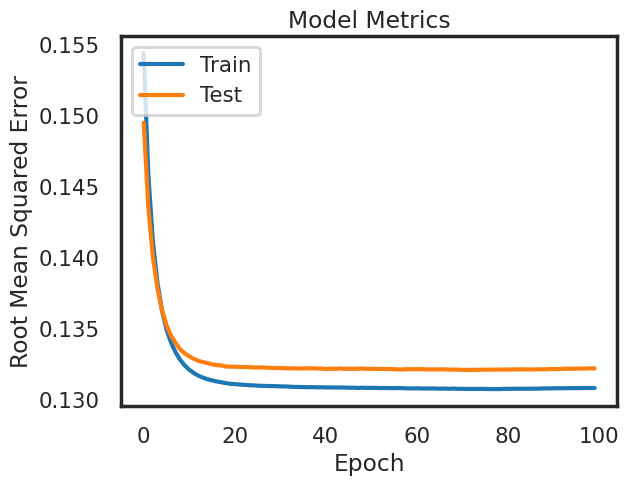

In [47]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Metrics')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Dari proses ini, kita memperoleh nilai error akhir sebesar sekitar 0.13 dan error pada data validasi sebesar 0.13 pula. Nilai tersebut cukup bagus untuk sistem rekomendasi. 

#### Mendapatkan Rekomendasi Anime untuk User

Untuk mendapatkan rekomendasi anime, pertama kita ambil sampel user secara acak dan definisikan variabel `anime_not_rated` yang merupakan daftar anime yang belum pernah diberikan rating oleh pengguna. Hal ini karena daftar `anime_not_rated` inilah yang akan menjadi anime yang kita rekomendasikan. 

Sebelumnya, pengguna telah memberi rating pada beberapa anime yang telah mereka tonton. Kita menggunakan rating ini untuk membuat rekomendasi anime yang mungkin cocok untuk pengguna. Nah, anime yang akan direkomendasikan tentulah anime yang belum pernah diberikan rating oleh pengguna. Oleh karena itu, kita perlu membuat variabel `anime_not_rated` sebagai daftar anime untuk direkomendasikan pada pengguna. 

Variabel `anime_not_rated` diperoleh dengan menggunakan operator bitwise (~) pada variabel `anime_rated_by_user`.

In [98]:
anime_df = df_anime[['anime_id', 'name', 'genre', 'type']]
df = df_rating.copy()

# Mengambil sample user
user_id = df.user_id.sample(1).iloc[0]
anime_rated_by_user = df[df.user_id == user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
anime_not_rated = anime_df[~anime_df['anime_id'].isin(anime_rated_by_user.anime_id.values)]['anime_id'] 
anime_not_rated = list(
    set(anime_not_rated)
    .intersection(set(anime_to_anime_encoded.keys()))
)
 
anime_not_rated = [[anime_to_anime_encoded.get(x)] for x in anime_not_rated]
user_encoder = user_to_user_encoded.get(user_id)
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_rated), anime_not_rated)
)

Selanjutnya, untuk memperoleh rekomendasi anime, gunakan fungsi `model.predict()` dari library Keras.

In [99]:
ratings = model.predict(user_anime_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_anime_ids = [
    anime_encoded_to_anime.get(anime_not_rated[x][0]) for x in top_ratings_indices
]
 
print('Showing best anime recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Anime with high ratings from user')
print('----' * 8)
 
top_recommend_user = (
    anime_rated_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .anime_id.values
)
 
anime_df_rows = anime_df[anime_df['anime_id'].isin(top_recommend_user)]
for row in anime_df_rows.itertuples():
    print(row.name, ':', row.genre)
 
print('----' * 8)
print('Top 10 Anime recommendation')
print('----' * 8)
 
recommended_anime = anime_df[anime_df['anime_id'].isin(recommended_anime_ids)]
for row in recommended_anime.itertuples():
    print(row.name, ':', row.genre)

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Showing best anime recommendations for users: 1798
Anime with high ratings from user
--------------------------------
Ookami to Koushinryou II : Adventure, Fantasy, Historical, Romance
Toki wo Kakeru Shoujo : Adventure, Drama, Romance, Sci-Fi
Angel Beats! : Action, Comedy, Drama, School, Supernatural
Ookami to Koushinryou : Adventure, Fantasy, Historical, Romance
Kill la Kill : Action, Comedy, School, Super Power
--------------------------------
Top 10 Anime recommendation
--------------------------------
Kimi no Na wa. : Drama, Romance, School, Supernatural
Fullmetal Alchemist: Brotherhood : Action, Adventure, Drama, Fantasy, Magic, Military, Shounen
Gintama° : Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
Steins;Gate : Sci-Fi, Thriller
Gintama : Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
Hunter x Hunter (2011) : Action, Adventure, Shounen, Super Power
Ginga Eiyuu Densetsu : Drama, Military, Sci-Fi, Space
Gintam

Sebagai contoh, hasil di atas adalah rekomendasi untuk user dengan id 1798. Dari output tersebut, kita dapat membandingkan antara _Anime with high ratings from user_ dan _Top 10 Anime recommendation_ untuk user. 

Perhatikanlah, beberapa rekomendasi anime memiliki genre yang sesuai dengan rating user.

## Conclusion

Sistem rekomendasi ini dirancang untuk mempermudah pengguna dalam menemukan anime sesuai dengan minat mereka. Untuk pengguna baru yang belum memiliki riwayat menonton anime, sistem rekomendasi menggunakan collaborative filtering dapat digunakan untuk merekomendasikan anime berdasarkan rating yang diberikan oleh pengguna lain. Sedangkan untuk pengguna yang telah memiliki riwayat menonton anime, sistem rekomendasi menggunakan content-based filtering dapat digunakan untuk membantu mereka memilih anime berdasarkan genre atau plot yang mirip dengan anime yang telah mereka tonton sebelumnya.

## References

[1] Nuurshadieq and A. T. Wibowo, "Leveraging Side Information to Anime Recommender System using Deep learning," 2020 3rd International Seminar on Research of Information Technology and Intelligent Systems (ISRITI), Yogyakarta, Indonesia, 2020, pp. 62-67, doi: 10.1109/ISRITI51436.2020.9315363.

[2] S. Ota, H. Kawata, M. Muta, S. Masuko, dan J. Hoshino, "AniReco: Japanese Anime Recommendation System," dalam Entertainment Computing – ICEC 2017, N. Munekata, I. Kunita, dan J. Hoshino, Eds. Cham: Springer, 2017, jld. 10507. https://doi.org/10.1007/978-3-319-66715-7_49.

[3] F. Ricci, L. Rokach, dan B. Shapira, "Introduction to Recommender Systems Handbook," dalam Recommender Systems Handbook, F. Ricci, L. Rokach, B. Shapira, dan P. Kantor, Eds. Boston, MA: Springer, 2011. https://doi.org/10.1007/978-0-387-85820-3_1.